In [4]:
import numpy as np
import pandas as pd

import main, clean

## Resultados de las condiciones base

In [5]:
# Importar condiciones base
base_conditions = clean.convert("EscenarioA.csv", ",", True)[0]


Obtained a dataframe with the following fields:

 LastMilestoneAcheivedColumn     int64
Created                        object
Removed                        object
PID                             int64
Unnamed: 4                      int64
dtype: object 


Dataframe description:
####################################################################################################
     LastMilestoneAcheivedColumn              Created             Removed  PID  \
0                             3   18/08/2020 8:02:56  18/08/2020 8:22:43    1   
1                             3   18/08/2020 8:06:56  18/08/2020 9:11:09    2   
2                             3   18/08/2020 8:07:00  18/08/2020 8:31:06    3   
3                             3   18/08/2020 8:07:55  18/08/2020 9:10:49    4   
4                             3   18/08/2020 8:09:05  18/08/2020 8:55:29    5   
..                          ...                  ...                 ...  ...   
95                            3  18/08/2020 16:50:

In [6]:
FORMAT = '%d/%m/%Y %H:%M:%S'

def clean_results(df, format_=FORMAT, print_intermediate=False):
    """
    Convertir las fechas almacenadas como texto al formato de Python para fechas
    """

    for column in ["Created", "Removed"]:
        dates = pd.to_datetime(df[column], format=format_)
        dates = [x.to_pydatetime() for x in dates]
        df[column] = dates
        
    if print_intermediate: print(df)
    
    return df

base_conditions = clean_results(base_conditions, FORMAT, True)

    LastMilestoneAcheivedColumn             Created             Removed  PID  \
0                             3 2020-08-18 08:02:56 2020-08-18 08:22:43    1   
1                             3 2020-08-18 08:06:56 2020-08-18 09:11:09    2   
2                             3 2020-08-18 08:07:00 2020-08-18 08:31:06    3   
3                             3 2020-08-18 08:07:55 2020-08-18 09:10:49    4   
4                             3 2020-08-18 08:09:05 2020-08-18 08:55:29    5   
..                          ...                 ...                 ...  ...   
95                            3 2020-08-18 16:50:09 2020-08-19 01:50:52   96   
96                            3 2020-08-18 16:53:31 2020-08-19 01:51:16   97   
97                            3 2020-08-18 16:55:11 2020-08-19 02:24:14   98   
98                            3 2020-08-18 16:56:40 2020-08-19 02:03:57   99   
99                            3 2020-08-18 16:59:45 2020-08-19 02:25:13  100   

    Unnamed: 4  
0            0  
1    

In [7]:
COLUMN_NAMES = {"Created": {
                    "es": "entrada", "en":"Created"},
                "Removed": {
                    "es": "salida", "en":"Removed"},
                "Duration": {
                    "es": "duracion", "en":"Duration"},
                "Hour": {
                    "es": "hora", "en":"Hour"},
               }

def add_info(df, language_to="es", language_from="en", column_names=COLUMN_NAMES, print_intermediate=False):
    """
    Añadir información adicional y cambiar los nombres de las columnas
    """
    
    # Calcular duración de estadía
    deltas = df["Removed"] - df["Created"]
    # Convertir a minutos e insertar en dataframe
    df["Duration"] = pd.to_numeric(deltas).div(10**9).div(60)
    # Añadir una columna con la hora a la que llegó el paciente
    df["Hour"] = [x.hour for x in df["Created"]]
    # Cambiar nombres
    translations = { column_names[x][language_from]: column_names[x][language_to] for x in column_names.keys()}
    df = df.rename(columns=translations)
    if print_intermediate: print(df)

    return df

base_conditions = add_info(base_conditions)

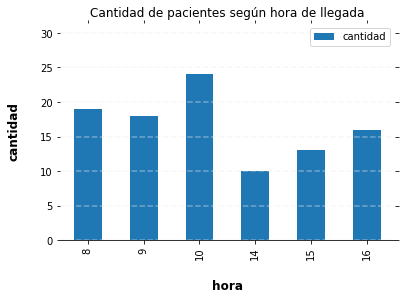

In [8]:
def chart1(df, column):
    title, x_axisname, y_axisname = "Cantidad de pacientes según hora de llegada", "hora", "cantidad"
    ax1 = clean.build_count_barchart(df, title, x_axisname, y_axisname, None, False)
    clean.customizechart(ax1, title, x_axisname, y_axisname)

chart1(base_conditions, 'hora')

In [9]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
(base_conditions['duracion'].to_frame()).describe()

,duracion
count,100.0
mean,328.0
std,148.3
min,19.8
25%,219.2
50%,340.1
75%,452.0
max,583.7


In [10]:
# Hora a la que salió el último paciente
base_conditions['salida'].max()

Timestamp('2020-08-19 02:25:13')

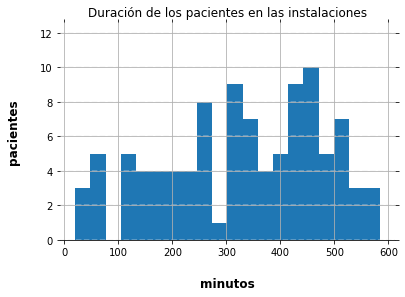

In [11]:
def chart2(df, column):
    
    bins=20
    data=df[column]
    ax = data.hist(bins=bins)
    title, xlabel, ylabel = "Duración de los pacientes en las instalaciones", "minutos", "pacientes"
    clean.customizechart(ax, title, xlabel, ylabel)    

chart2(base_conditions, 'duracion')

## Resultados del escenario B

In [12]:
scenario_b = clean.convert("EscenarioB.csv", ",", False)[0]
scenario_b = clean_results(scenario_b, FORMAT, False)
scenario_b = add_info(scenario_b)

In [13]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
(scenario_b['duracion'].to_frame()).describe()

,duracion
count,100.0
mean,84.6
std,45.8
min,6.2
25%,48.6
50%,76.3
75%,114.1
max,189.2


In [14]:
# Hora a la que salió el último paciente
scenario_b['salida'].max()

Timestamp('2020-08-18 18:56:51')

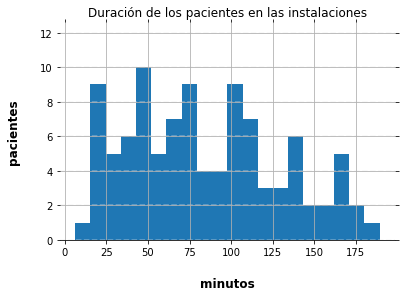

In [15]:
chart2(scenario_b, 'duracion')

## Resultados del escenario C

In [16]:
scenario_c = clean.convert("EscenarioC.csv", ",", False)[0]
scenario_c = clean_results(scenario_c, FORMAT, False)
scenario_c = add_info(scenario_c)

In [17]:
pd.set_option('display.float_format', lambda x: '%.1f' % x)
(scenario_c['duracion'].to_frame()).describe()

,duracion
count,100.0
mean,64.0
std,31.0
min,6.2
25%,41.4
50%,60.1
75%,84.8
max,161.9


In [18]:
# Hora a la que salió el último paciente
scenario_c['salida'].max()

Timestamp('2020-08-18 18:24:51')

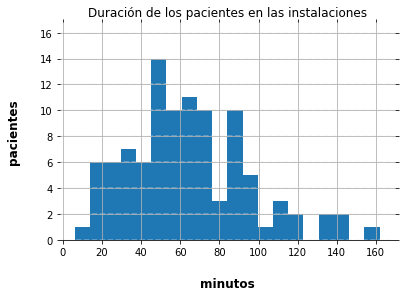

In [19]:
chart2(scenario_c, 'duracion')